In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Time Series

In [2]:
folder = Path(r"E:\University\TU Berlin\DSESM\Website\data-science-for-esm\1_Personal Project\CO2 Emission")
files = folder.glob("*.csv")  # all Excel files in the folder

df_list = []
for f in files:
    df = pd.read_csv(f, parse_dates=["month"])
    df_list.append(df)

# Combine into one DataFrame
data = pd.concat(df_list).sort_values("month").reset_index(drop=True)

data = data.set_index("month")

<Figure size 1200x600 with 0 Axes>

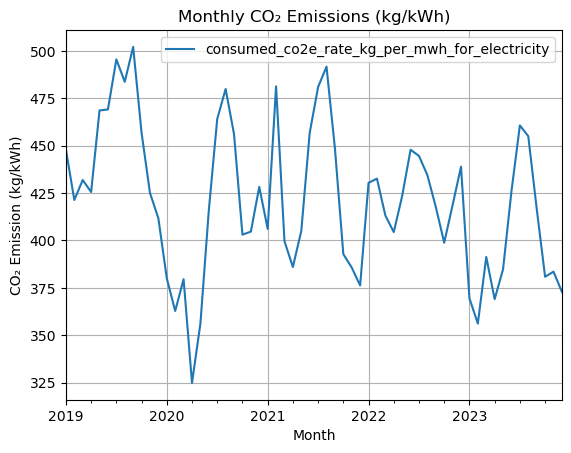

In [3]:
plt.figure(figsize=(12,6))
data.plot(y='consumed_co2e_rate_kg_per_mwh_for_electricity', legend=True)
plt.title("Monthly CO₂ Emissions (kg/kWh)")
plt.xlabel("Month")
plt.ylabel("CO₂ Emission (kg/kWh)")
plt.grid(True)
plt.show()


In [4]:
# Ensure monthly frequency (important for AutoARIMA/Prophet)
data = data.asfreq('MS')  # MS = Month Start
monthly_series = data['consumed_co2e_rate_kg_per_mwh_for_electricity']

# Trends and Seasonality

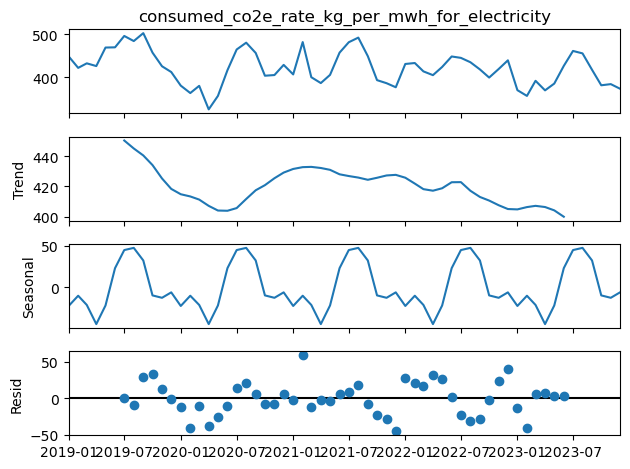

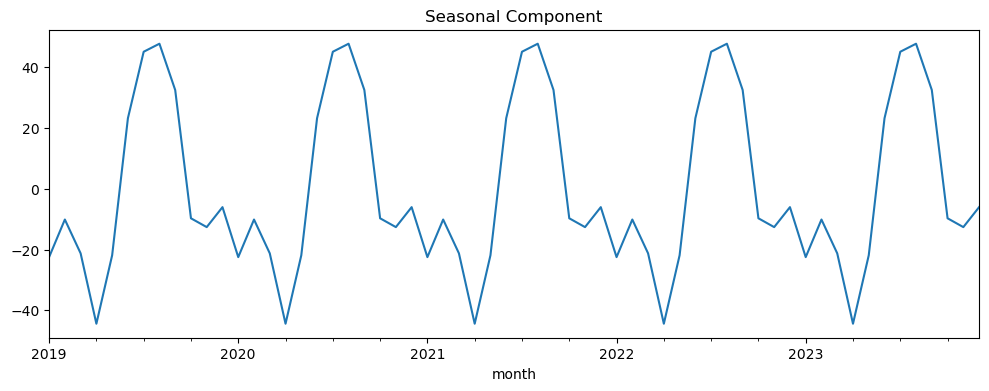

In [5]:
# Decompose series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly_series, model='additive', period=12)  # period=12 for monthly data

# Plot
result.plot()
plt.show()

# Optional: plot only the seasonal component
plt.figure(figsize=(12,4))
result.seasonal.plot(title='Seasonal Component')
plt.show()


# AutoARIMA

In [6]:
from pmdarima import auto_arima

# Step 1: Use auto_arima to find the best parameters
arima_model = auto_arima(monthly_series,
                         seasonal=True,
                         m=12,                 # monthly seasonality
                         trace=True,
                         suppress_warnings=True)

# Extract best orders
order = arima_model.order
seasonal_order = arima_model.seasonal_order
print("Best order:", order)
print("Best seasonal order:", seasonal_order)


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=615.362, Time=0.01 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=582.854, Time=0.39 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=591.111, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=897.993, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=584.168, Time=0.04 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=584.046, Time=0.78 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=585.333, Time=0.44 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=583.438, Time=0.12 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=617.338, Time=0.04 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=583.342, Time=0.30 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=583.977, Time=0.33 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=590.833, Time=0.31 sec


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,0,0)(1,0,0)[12] intercept
Total fit time: 5.482 seconds
Best order: (1, 0, 0)
Best seasonal order: (1, 0, 0, 12)


C:\Users\MS\anaconda3\envs\esm-ws-24-25\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# SARIMAX

                                             SARIMAX Results                                             
Dep. Variable:     consumed_co2e_rate_kg_per_mwh_for_electricity   No. Observations:                   60
Model:                            SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -220.386
Date:                                           Sun, 05 Oct 2025   AIC                            450.772
Time:                                                   23:28:35   BIC                            459.915
Sample:                                               01-01-2019   HQIC                           454.197
                                                    - 12-01-2023                                         
Covariance Type:                                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

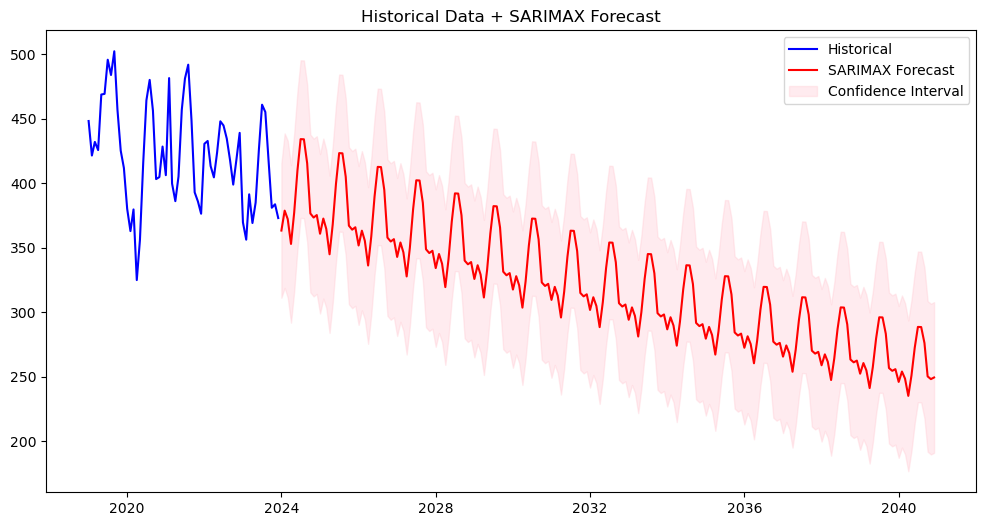

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (1, 0, 1)              # p,d,q (q=1 for Non-seasonal MA)
seasonal_order = (1, 0, 1, 12) # P,D,Q,m (Q=1 for Seasonal MA)

# SARIMAX Model
sarimax_model = SARIMAX(monthly_series,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
sarimax_fit = sarimax_model.fit(disp=False)

print(sarimax_fit.summary())

# Forecasting
n_periods = (2040 - monthly_series.index[-1].year) * 12
sarimax_forecast = sarimax_fit.get_forecast(steps=n_periods)

forecast_mean = sarimax_forecast.predicted_mean
forecast_ci = sarimax_forecast.conf_int()

# Build datetime index for forecast
forecast_index = pd.date_range(start=monthly_series.index[-1] + pd.offsets.MonthEnd(),
                               periods=n_periods, freq='ME')
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_series, label="Historical", color="blue")
plt.plot(forecast_mean, label="SARIMAX Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color="pink", alpha=0.3, label="Confidence Interval")
plt.legend()
plt.title("Historical Data + SARIMAX Forecast")
plt.show()


# Prophet

23:28:36 - cmdstanpy - INFO - Chain [1] start processing
23:28:37 - cmdstanpy - INFO - Chain [1] done processing


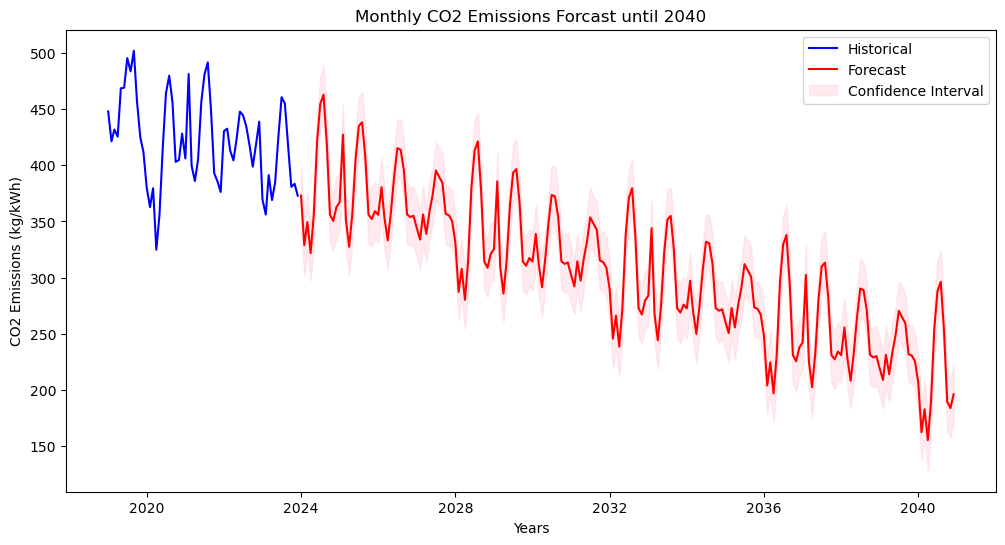

In [8]:
from prophet import Prophet

monthly_series.index = pd.to_datetime(monthly_series.index)

# Prepare data for Prophet
df = monthly_series.reset_index()
df.columns = ['ds', 'y']

# Fit Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(df)

# Forecast horizon until 2040
n_months = (2040 - df['ds'].dt.year.max()) * 12
future = prophet_model.make_future_dataframe(periods=n_months, freq='MS')
forecast = prophet_model.predict(future)

# Separate only the forecast (future) dates
forecast_future = forecast[forecast['ds'] > monthly_series.index[-1].to_pydatetime()]

# Create forecast series for plotting
forecast_series = pd.Series(forecast_future['yhat'].values, index=forecast_future['ds'])

# Plot historical + forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_series, label='Historical', color='blue')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_future['ds'], 
                 forecast_future['yhat_lower'], 
                 forecast_future['yhat_upper'], 
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.xlabel("Years")
plt.ylabel("CO2 Emissions (kg/kWh)")
plt.title('Monthly CO2 Emissions Forcast until 2040')
plt.show()
